In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
cd Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


importing IPython notebook from DX_screen

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

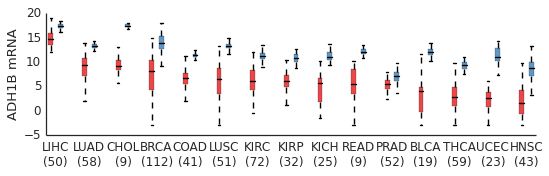

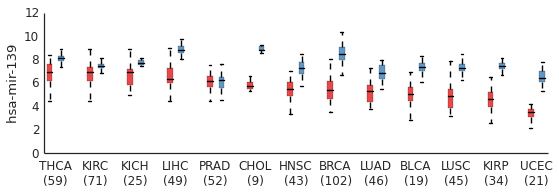

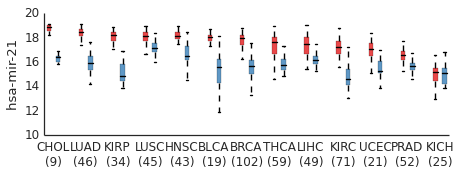

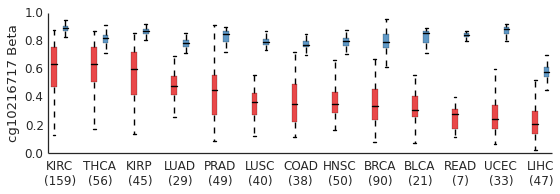

In [4]:
from DX_screen import *

In [5]:
proliferation = pd.read_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv',
                            header=None, index_col=[0,1], squeeze=True)
proliferation = proliferation[:,1]
proliferation.name = 'proliferation'

In [91]:
f = dx_rna.frac.order()
f = f[(f - .5).abs() > .05][::10]
df = rna_df.ix[f.index, ti(codes=='KIRC')].xs('01',1,1)

In [92]:
df.shape

(1403, 533)

In [ ]:
get_co

In [93]:
%time res = cox_screen(df, surv_5y)

CPU times: user 3min 46s, sys: 1.63 s, total: 3min 48s
Wall time: 3min 48s


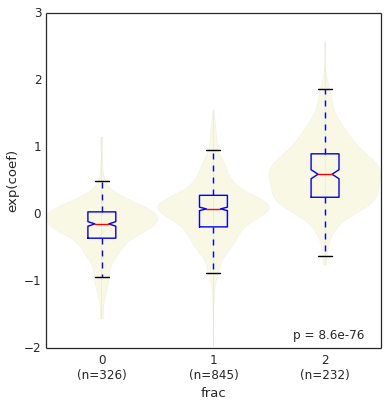

In [103]:
fig, ax = subplots(1,1, figsize=(6,6))
violin_plot_pandas(np.floor(f * 3), np.log2(res.hazard['exp(coef)']), ax=ax,
                   order=[0,1,2])
#ax.axhline(0, color='grey', lw=2, ls='--', zorder=-1)
#ax.axvline(.5, color='grey', lw=2, ls='--', zorder=-1)

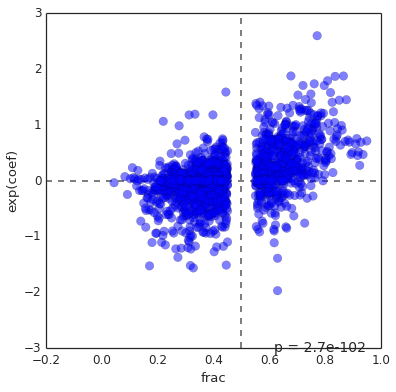

In [95]:
fig, ax = subplots(1,1, figsize=(6,6))
series_scatter(f, np.log2(res.hazard['exp(coef)']), ax=ax)
ax.axhline(0, color='grey', lw=2, ls='--', zorder=-1)
ax.axvline(.5, color='grey', lw=2, ls='--', zorder=-1)

In [104]:
f = dx_rna.frac.order()
f = f[(f - .5).abs() > .05][::10]
df = rna_df.ix[f.index, ti(codes=='LGG')].xs('01',1,1)

In [110]:
%time res = cox_screen(df, surv_5y.ix[df.columns])

CPU times: user 3min 54s, sys: 1.65 s, total: 3min 56s
Wall time: 3min 56s


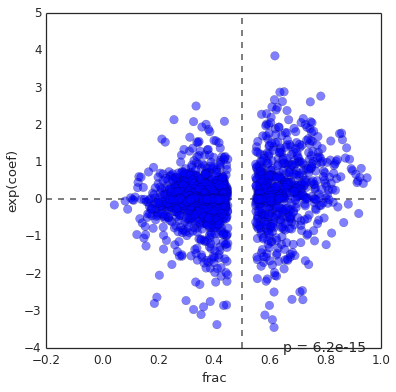

In [111]:
fig, ax = subplots(1,1, figsize=(6,6))
series_scatter(f, np.log2(res.hazard['exp(coef)']), ax=ax)
ax.axhline(0, color='grey', lw=2, ls='--', zorder=-1)
ax.axvline(.5, color='grey', lw=2, ls='--', zorder=-1)

In [316]:
f = dx_rna.frac.order()
f = f[(f - .5).abs() > .02][::3]
df = rna_df.ix[f.index, ti(codes=='ACC')].xs('01',1,1)
df = df.sub(df.mean(1), 0).div(df.std(1), 0)

In [318]:
df.shape

(5565, 79)

In [319]:
%time res = cox_screen(df, surv_5y.ix[df.columns])

CPU times: user 4min 17s, sys: 5.43 s, total: 4min 22s
Wall time: 4min 23s


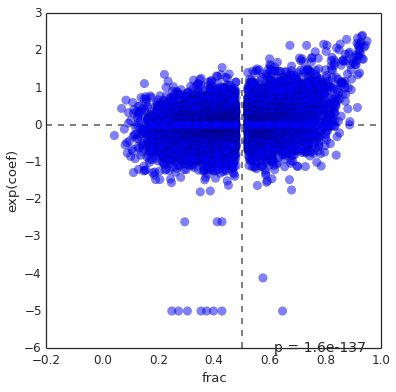

In [320]:
fig, ax = subplots(1,1, figsize=(6,6))
series_scatter(f, np.log2(res.hazard['exp(coef)']).clip(-5,5), ax=ax)
ax.axhline(0, color='grey', lw=2, ls='--', zorder=-1)
ax.axvline(.5, color='grey', lw=2, ls='--', zorder=-1)

In [321]:
spearman_pandas(f, np.log2(res.hazard['exp(coef)']))

rho     3.26e-01
p      1.64e-137
dtype: float64

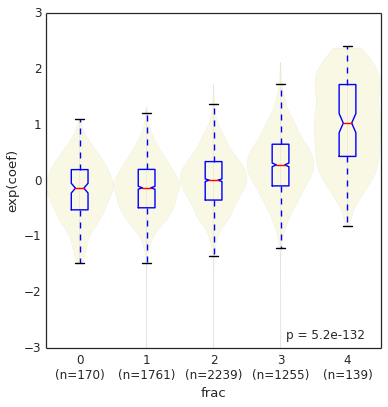

In [322]:
fig, ax = subplots(1,1, figsize=(6,6))
violin_plot_pandas(np.floor(f * 5), np.log2(res.hazard['exp(coef)']).clip(-3,3), ax=ax,
                   order=[0,1,2,3,4])
#ax.axhline(0, color='grey', lw=2, ls='--', zorder=-1)
#ax.axvline(.5, color='grey', lw=2, ls='--', zorder=-1)

In [143]:
standardize = lambda s: (s - s.mean()) / s.std()

In [324]:
v2 = v.ix[keepers]
idx = v2.index.intersection(s2.index.levels[0]).intersection(codes.index)
s2 = surv_5y.ix[idx]
cc = codes.ix[idx]
fmla = robjects.Formula('Surv(days, event) ~ feature + strata(codes)')

In [325]:
df = rna_df.xs('01',1,1).ix[:, idx]
f = dx_rna.frac.order()
#f = f[(f - .5).abs() > .05][::100]
df = df.ix[f.index]
df = df.sub(df.mean(1), 0).div(df.std(1), 0)

In [326]:
df.shape

(18465, 6348)

In [ ]:
%%time
r_pancan = {}
for g,v in df.iterrows():
    m = get_cox_ph(s2, v, cc, formula=fmla, get_model=True)
    r_pancan[g] = m[0][0]
r_pancan = pd.Series(r_pancan)

here

In [397]:
np.exp(.2)

1.2214027581601699

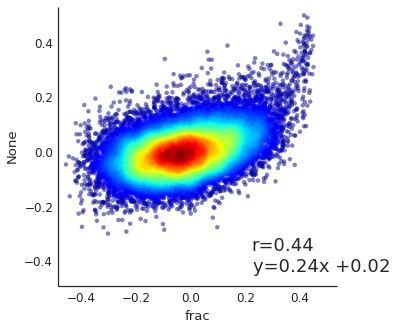

In [343]:

plot_regression(f-.5, r_pancan.order(), density=True, rad=.03, s=20,
                line_args={'lw':0}, rasterized=True)

In [395]:
fisher_exact_test(f[(f-.5).abs() > .1] > .5, r_pancan > 0)

odds_ratio    6.34
p             0.00
dtype: float64

In [392]:
fisher_exact_test(f > .5, r_pancan > 0)

odds_ratio     3.09e+00
p             2.16e-299
dtype: float64

In [344]:
d = pd.concat([f, r_pancan], keys=['f','r'], axis=1)

In [379]:
fmla = robjects.Formula('Surv(days, event) ~ feature + proliferation + strata(codes) + feature:proliferation')
get_cox_ph(s2, df.ix['APCDD1L'], [cc,proliferation], formula=fmla, get_model=False, print_desc=True)


                        coef exp(coef) se(coef)     z       p
feature                0.337     1.401   0.0362  9.31 0.0e+00
proliferation          0.480     1.615   0.0580  8.27 1.1e-16
feature:proliferation -0.130     0.878   0.0345 -3.75 1.8e-04

Likelihood ratio test=178  on 3 df, p=0  n= 6348, number of events= 1426 



In [ ]:
draw_survival_curves(df.ix['CISH'], surv_5y, to )

In [376]:
d[d.f < .8].sort('r').tail()

,f,r
ANXA2,0.57,0.34
APCDD1L,0.41,0.35
FAM83D,0.74,0.35
ANXA2P2,0.56,0.37
GPX8,0.64,0.40


In [ ]:
pearson_pandas(f, r_pancan)

In [396]:
pwd

u'/cellar/users/agross/TCGA_Code/DX/Notebooks'

In [331]:
r_pancan.to_csv('r_pancan.csv')

In [154]:
v2 = v.groupby(cc).apply(standardize)
idx = v2.index.intersection(s2.index.levels[0])
s2 = surv_5y.ix[idx]
v2 = v2.ix[idx]
cox(v2, surv_5y).LR.p

0.0091776663969247441

In [ ]:
f = dx_rna.frac.order()
f = f[(f - .5).abs() > .05][::10]
df = rna_df.ix[f.index, ti(codes=='KIRC')].xs('01',1,1)

In [160]:
cox_screen??

In [164]:
%time cox(v2.ix[keepers], surv_5y)

CPU times: user 170 ms, sys: 35 µs, total: 170 ms
Wall time: 169 ms


hazard       exp(coef)     0.95
             exp(-coef)    1.06
             lower .95     0.90
             upper .95     1.00
LR           stat          4.11
             df            1.00
             p             0.04
concordance  stat          0.52
             se            0.01
dtype: float64

In [163]:
len(keepers)

7756